In [2]:
import numpy as np 
from sklearn.model_selection import train_test_split 
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv ("BreastCancerDataSet.csv")
df.replace('?',-99999 ,inplace =True)

In [4]:
df.drop(['id'],1,inplace =True)
df.head()

C:\Users\MeDo Elsayed\AppData\Local\Temp\ipykernel_3900\54855670.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'],1,inplace =True)


,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [5]:
x = np.array(df.drop(['class'],1))
y = np.array(df['class'])

C:\Users\MeDo Elsayed\AppData\Local\Temp\ipykernel_3900\778411305.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['class'],1))


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [7]:
## creating knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
accuracy = knn.score(x_test,y_test)
print(accuracy)

0.9642857142857143


In [8]:
# Making prediction
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures),-1)
prediction = knn.predict(example_measures)
print(prediction)

[2 2]


In [15]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay , classification_report
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[90,  4],
       [ 1, 45]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

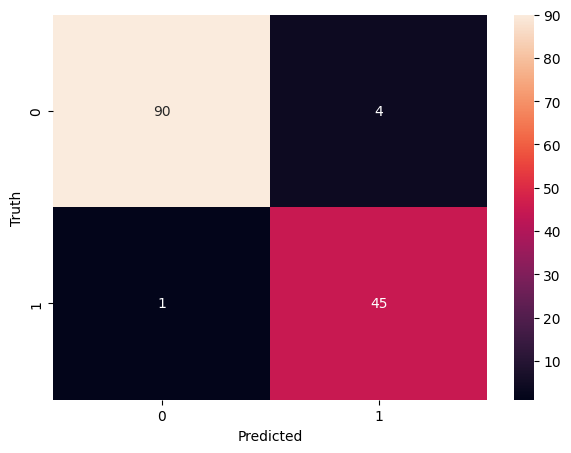

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.99      0.96      0.97        94
           4       0.92      0.98      0.95        46

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140

